In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def sixtracklib2standardUnits(A, Eb, Vcc, frev): 
    # convert the PSD from the rms noise as applied in Sixtracklib, A, to rad^2/Hz or V^2/Hz
    # Eb in eV, Vcc in V and frev in Hz
    scaling_factor = Eb/Vcc # scaling factor to rms noise, σ
    PSD = (A*scaling_factor)**2/frev
    return PSD

In [15]:
def standardUnits2sixtracklib(PSD, Eb, Vcc, frev): 
    # convert the PSD from rad^2/Hz or V^2/Hz to the rms noise as applied in Sixtracklib, A
    # Eb in eV, Vcc in V and frev in Hz
    scaling_factor = Vcc/Eb # scaling factor to rms noise, σ
    A = np.sqrt(PSD*frev)*scaling_factor
    return A

In [16]:
def create_noise_kicks(mu, A, turns):
    # create sequence of noise kicks, as they applied in the simulations
    # A the rms amplitude, mu the mean of the normal distribution and turns the number of simulated turns
    return(np.random.normal(mu, A, turns))

In [ ]:
def SSB_to_PSD(L):
    # convert the SSB measumeasured SSB, L(f), from the isntrument to S(f)

In [17]:
standardUnits2sixtracklib(2e-11, 270e9, 1e6, 43.45e3)

3.4525988700507905e-09

5.029123542713992e-14
2.0022689449772767e-11


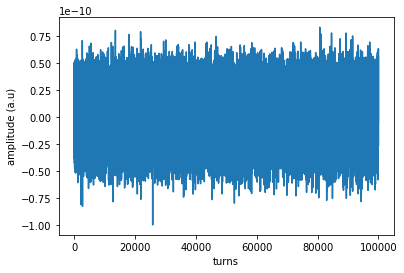

In [21]:
kicks = create_noise_kicks(0, 2e-11, int(1e5))
plt.plot(kicks)
plt.xlabel('turns')
plt.ylabel('amplitude (a.u)')
print(np.mean(kicks))
print(np.std(kicks))